# Imports

In [4]:
%pip install opencv-python==4.5.5.64

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import rcParams
import matplotlib.pyplot as plt
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
from imutils.paths import list_images
import numpy as np
import argparse
import pickle
import imutils
import cv2
import warnings
warnings.filterwarnings("ignore")

# Load the Images
reference:https://medium.com/analytics-vidhya/how-to-load-any-image-dataset-in-python-3bd2fa2cb43d

In [4]:
# Prepare your dataset here
from ImagesLoader import MasterImage
path  = "./Data/"
input_shape = 128
image_data = MasterImage(PATH= path,IMAGE_SIZE = input_shape)
(images_,labels_)=image_data.load_dataset()

Reading Dataset from PIckle Object


In [5]:
uni = np.unique(labels_,return_counts=True)[0]
uni

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
np.where(uni == 10)[0][0]

9

In [7]:
# labels_ = np.array(labels_)
all_labels = [np.where(uni == i)[0][0] for i in labels_]
all_labels = np.array(all_labels)

In [8]:
all_labels.max()

9

In [9]:
images_[3].max()

255

### Train test split

In [10]:
from sklearn.model_selection import train_test_split

all_data = 500
# test_sample_size = 1000
images,_, labels, _ = train_test_split(images_,all_labels, train_size=all_data,random_state=0)
print(len(images))
X_train ,X_test, y_train, y_test = train_test_split(images,labels, test_size=.2,random_state=0)
X_train_gray ,X_test_gray, _, _ = train_test_split(images[:,:,:,0],labels, test_size=.2,random_state=0)


500


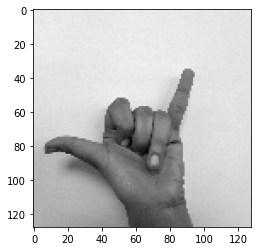

5

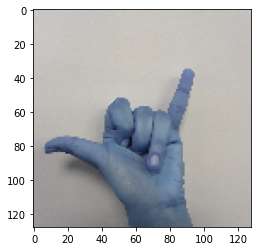

In [11]:
plt.imshow(X_train_gray[0],cmap="gray")
plt.show()
plt.imshow(X_train[0])

y_train[0]

In [10]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [32]:
X_train.shape

(400, 128, 128, 3)

### Visualize five samples of each class by plotting a grid using the matplotlib library

In [33]:
num_labels = len(np.unique(labels))

In [46]:
import random 


random.seed(100) # set a seed in case you want your experiments to be consistent

visualize_samples = []
sampleIndexes =[]
for i in np.unique(labels):
    images = X_train[np.array(y_train==i).reshape(-1)]
    allIndexes = list(range(0,len(images)))
    sampleIndexes = random.sample(allIndexes,5)
    visualize_samples.append(images[sampleIndexes])

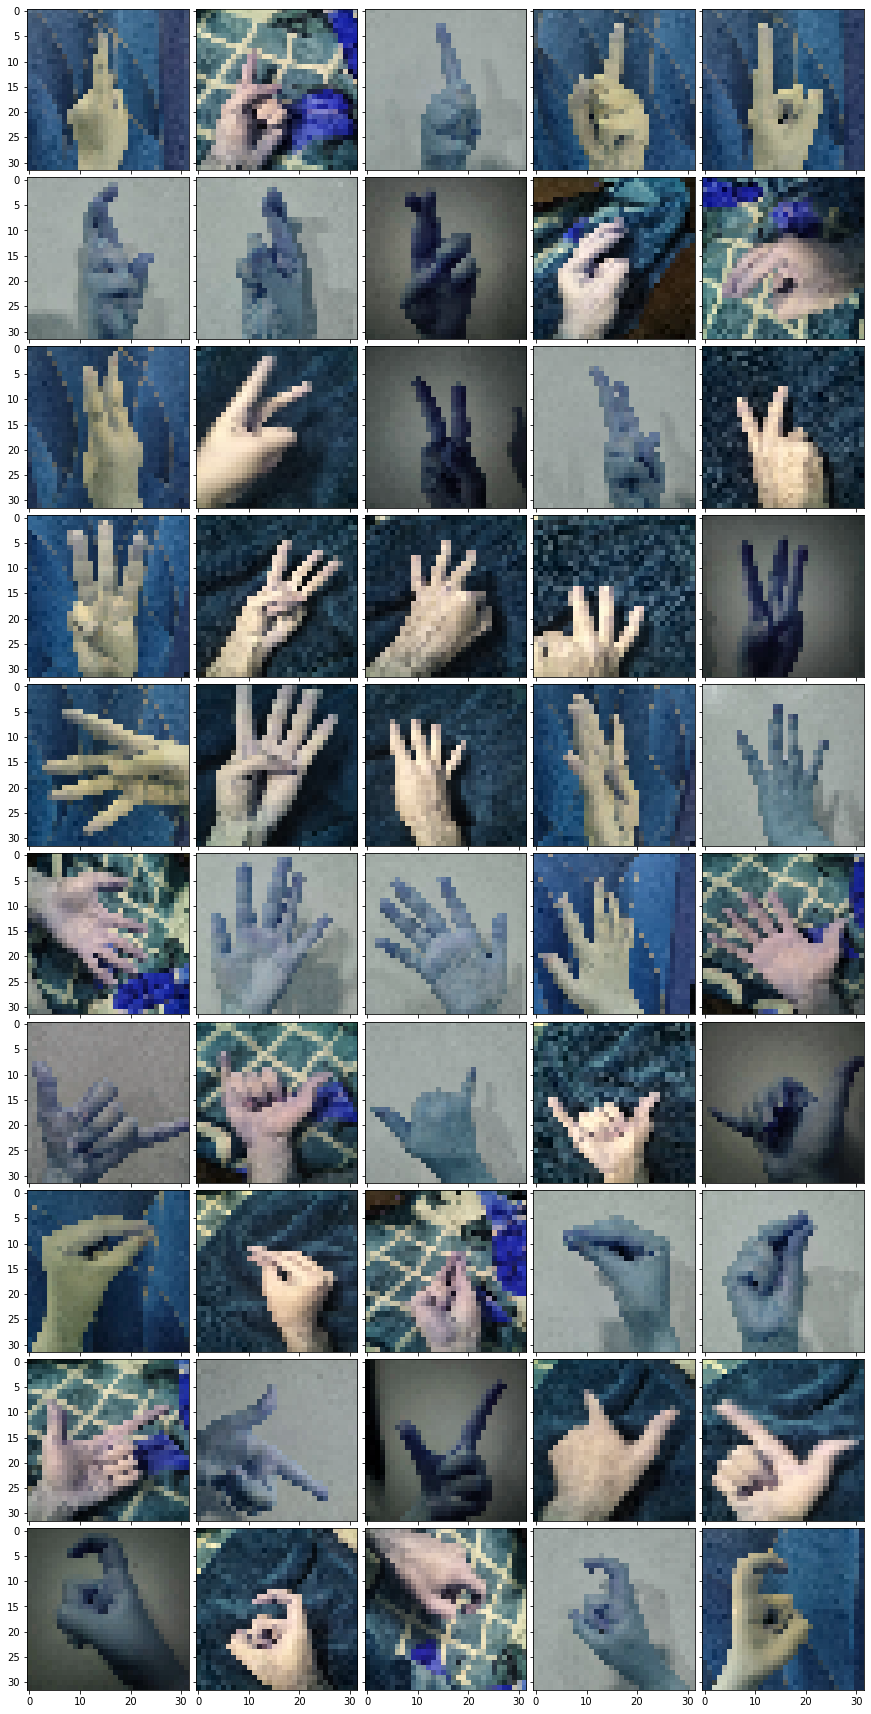

In [16]:



fig = plt.figure(figsize=(15., 200.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(num_labels, 5),  
                    axes_pad=0.1,  # pad between axes in inch.
                    )
g = 0
for r in range(num_labels):
    for c in range(5):
        grid[g].imshow(visualize_samples[r][c])
        g+=1
plt.show()

# Featue Enginearing

## Thresholding

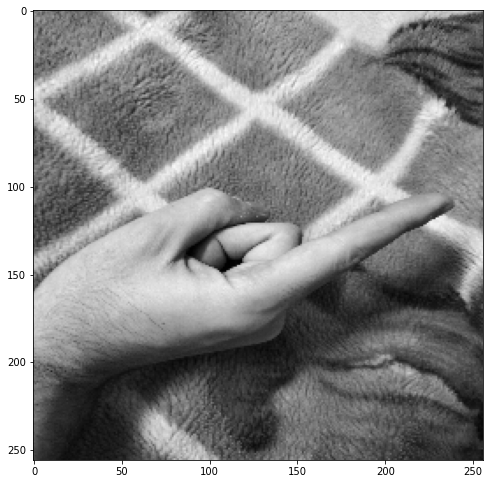

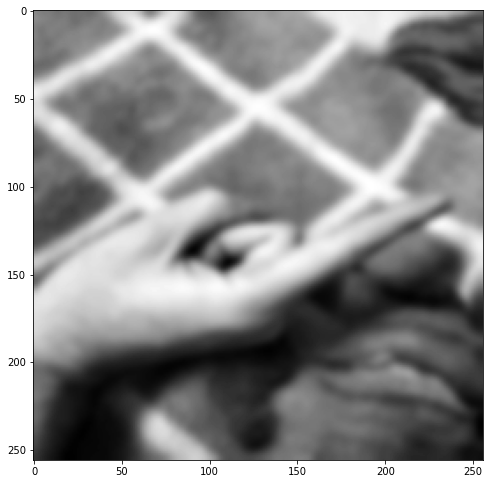

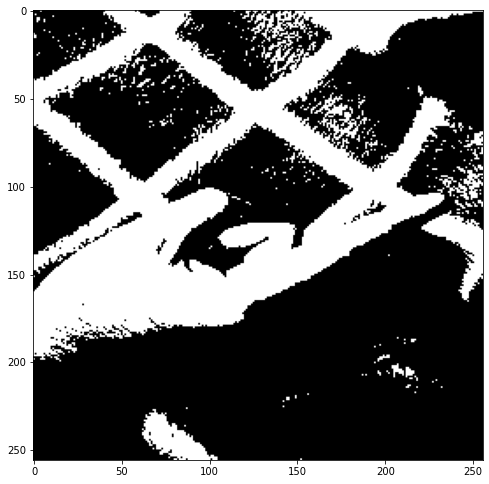

In [15]:
import cv2

# convert the image to grayscale, blur it, and threshold it
gray = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (13, 13), -100)
thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)[1]
# thresh = cv2.bitwise_not(X_train[13])
# thresh[thresh > 215] = 255
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(blurred,cmap="gray")
plt.show()
plt.imshow(thresh,cmap="gray")
plt.show()


reference:https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu

In [17]:
def plot_histogram(image, axes, bins=256):
    """Plot an image's histogram along with cumulative histogram.
       Adapted from the scikit-image examples
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram with mathplot hist
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skimage.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'original image')

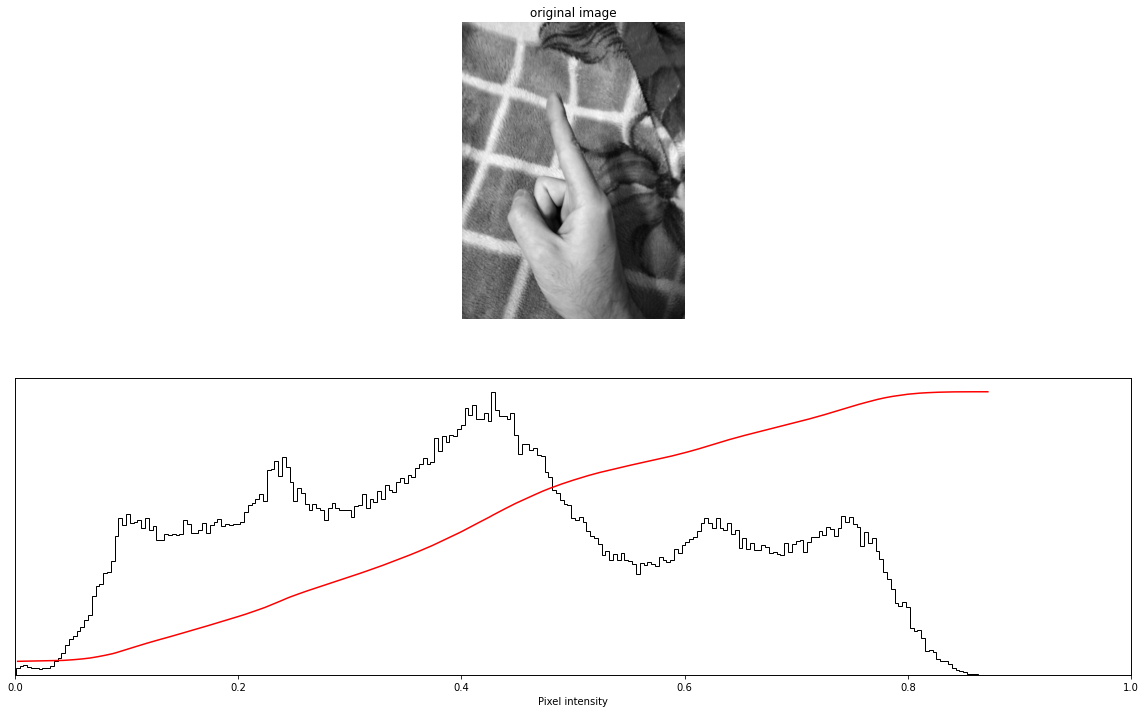

In [18]:
from skimage.io import imread
image = skimage.io.imread('./Data/1/IMG20221006164921.jpg',as_gray=True)
fig, axs = plt.subplots(2, 1,figsize=(20, 12))

ax_img, ax_hist, ax_cdf = plot_histogram(image, axs)
ax_img.set_title('original image')

0.57


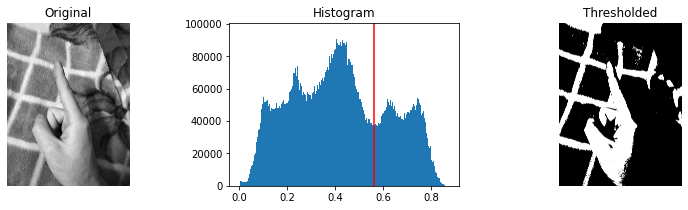

In [19]:
thresh = .57
print(thresh)
thresh = int(thresh*100)/100
binary = (image>thresh).astype(float)
# dispImage(binary)

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

63


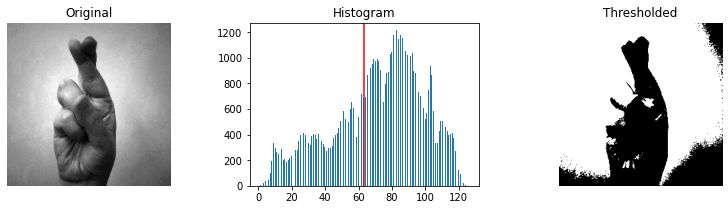

In [20]:
from skimage.filters import threshold_minimum, threshold_otsu
image = X_train[21,:,:,0]
thresh = threshold_otsu(image)
print(thresh)
thresh = int(thresh*100)/100
binary = (image>thresh).astype(float)
# dispImage(binary)

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [63]:
%pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=cff19dfc4c4d8a51887796ec655f0eaa53e9be480ec99876e38daa3c78edb5cc
  Stored in directory: c:\users\river\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


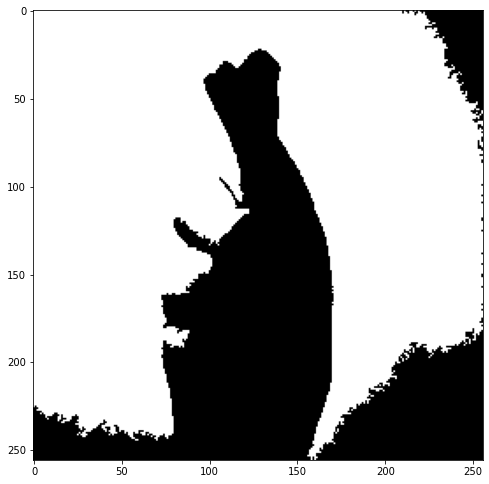

In [21]:

outline = np.zeros(binary.shape, dtype = "uint8")
x = cv2.convertScaleAbs(binary)
cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 255, -1)
plt.imshow(outline,cmap="gray")

In [83]:
outline

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

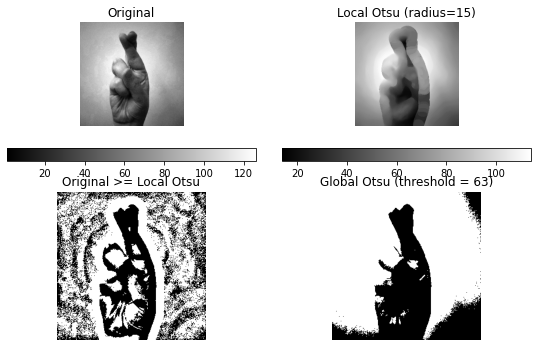

In [54]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = img_as_ubyte(image=image)

radius = 15
footprint = disk(radius)

local_otsu = rank.otsu(img, footprint)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

## Background Removal

In [ ]:
# %pip install numpy --upgrade
# %pip install mahotas
%pip install rembg

In [71]:
from rembg import remove
from PIL import Image

In [ ]:

im = Image.open("testImage.jpg")
out = remove(im)

In [8]:
print(np.array(im).shape)
np.array(out)[:,:,:3].shape

<IPython.core.display.Javascript object>

(4000, 3000, 3)


<IPython.core.display.Javascript object>

(4000, 3000, 3)

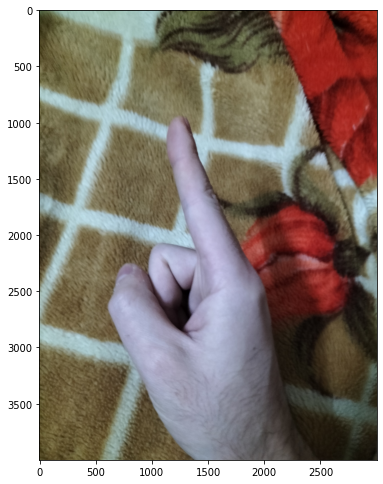

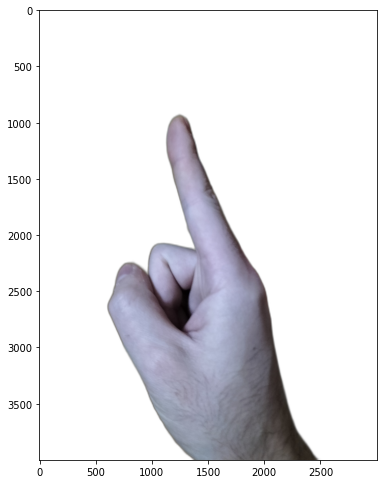

In [33]:
plt.imshow(im)
plt.show()
plt.imshow(out)

### remove background and save images

In [35]:
without_background = []
for image in images:
    without_background.append(remove(image))
without_background = np.array(without_background)


## To binary images

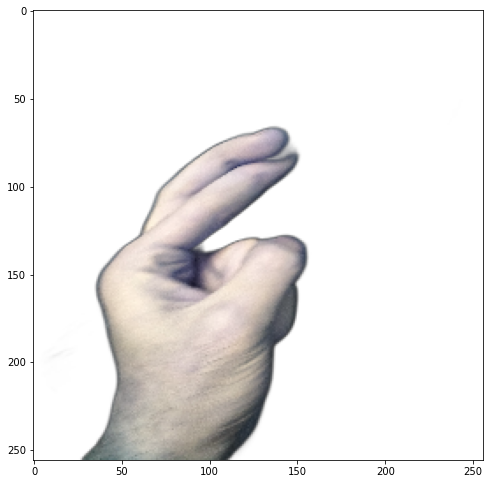

In [18]:
plt.imshow(without_background[35])

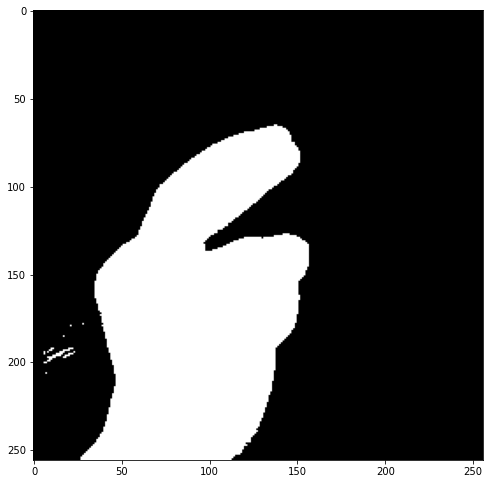

In [100]:
image = without_background[35,:,:,0]>0
plt.imshow(image,cmap = "gray")

* using threshold_otsu, cv2.findContours, imutils.grab_contours

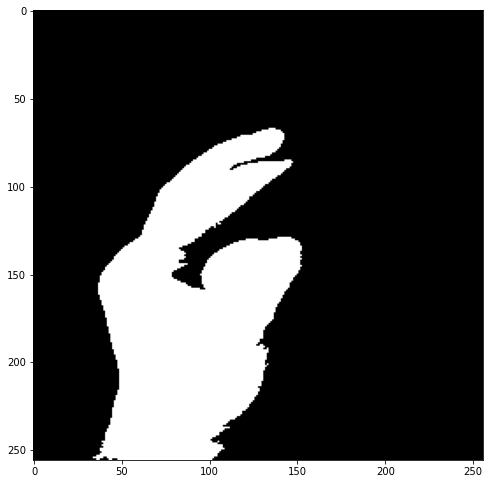

In [101]:
img = without_background[35,:,:,0]
thresh = threshold_otsu(img)
thresh = int(thresh*100)/100
binary = (img > thresh).astype(float)
outline = np.zeros(binary.shape, dtype = "uint8")
x = cv2.convertScaleAbs(binary)
cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 255, -1)
plt.imshow(outline,cmap = "gray")

## Splitting the data after removing the background

In [19]:
# %store without_background
%store labels

Stored 'labels' (ndarray)


In [128]:
%store -r without_background
%store -r labels

In [130]:
labels.max()

9

In [131]:
from sklearn.model_selection import train_test_split

X_train_free ,X_test_free, y_train, y_test = train_test_split(without_background[:,:,:,:3],labels, test_size=.2,random_state=0)
X_train_gray_free ,X_test_gray_free, _, _ = train_test_split(without_background[:,:,:,0],labels, test_size=.2,random_state=0)

## Zernike Moments 
Reference guid: https://pyimagesearch.com/2014/04/07/building-pokedex-python-indexing-sprites-using-shape-descriptors-step-3-6/
<br>Paper: https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/86/e3sconf_spatialdata2021_01002.pdf

In [61]:
%pip install -U numpy 

Note: you may need to restart the kernel to use updated packages.


In [68]:
from skimage.filters import threshold_minimum, threshold_otsu
from mahotas.features import zernike_moments

def getZernike(img,radius = 21):
    thresh = threshold_otsu(img)
    thresh = int(thresh*100)/100
    binary = (img < thresh).astype(float)
    outline = np.zeros(binary.shape, dtype = "uint8")
    x = cv2.convertScaleAbs(binary)
    cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts], -1, 255, -1)
    zernike  = zernike_moments(outline, radius)
    return zernike

In [111]:
def getZernike_free(img,radius = 21):
    img = remove(img)
    plt.imshow(img)
    plt.show()
    thresh = threshold_otsu(img[:,:,0])
    thresh = int(thresh*100)/100
    binary = (img < thresh).astype(float)
    plt.imshow(binary)
    plt.show()
    outline = np.zeros(binary.shape, dtype = "uint8")
    x = cv2.convertScaleAbs(binary)
    cnts = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts], -1, 255, -1)
    zernike  = zernike_moments(outline, radius)
    return zernike

In [112]:
X_train_z = []
X_test_z = []
radius = input_shape//2
for img in X_train_gray_free:
    X_train_z.append(getZernike(img,radius = radius))

for img in X_test_gray_free:
    X_test_z.append(getZernike(img,radius = radius))

In [26]:
X_train_z = np.array(X_train_z)
X_test_z = np.array(X_test_z)

In [27]:
X_train_z.shape

(400, 25)

In [21]:
# %store X_train_z
# %store X_test_z

%store -r X_train_z
%store -r X_test_z

# Baseline

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Import ResNet

In [22]:
X_train.shape

(400, 128, 128, 3)

In [18]:
# import keras
ResNet_model= keras.applications.resnet.ResNet101(include_top=False,
                                                  weights='imagenet', 
                                                  input_shape=X_train.shape[1:],
                                                  classes=10)
# ResNet_model.summary()

## Transfer Learning

In [24]:
ResNet_model.trainable = False
output= ResNet_model.layers[-1].output
output=Flatten()(output)
output=Dense(512, activation='relu')(output)
output=Dense(256, activation='relu')(output)
output=Dense(128, activation='relu')(output)
output=Dense(10, activation='softmax')(output)

ResNet_baseline=Model(inputs=ResNet_model.input, outputs=output)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 

# ResNet_baseline.summary()

## Early Stopping and fit

In [15]:

ResNet_baseline.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

ResNet_results =ResNet_baseline.fit(X_train,y_train,
                                #  steps_per_epoch = 20,
                                 epochs=20,
                                 verbose=1,
                                 batch_size=128,
                                 callbacks=[callback], 
                                 validation_data=(X_test, y_test))

# Evaluate the model

In [58]:
test_evaluate = ResNet_baseline.evaluate(X_test, y_test, batch_size=128)
print('Test Loss:', test_evaluate[0])
print('Test Accuracy:', test_evaluate[1])

1/1 [==============================] - 4s 4s/step - loss: 1.7954 - accuracy: 0.5800
Test Loss: 1.7954459190368652
Test Accuracy: 0.5799999833106995


## Plot the loss

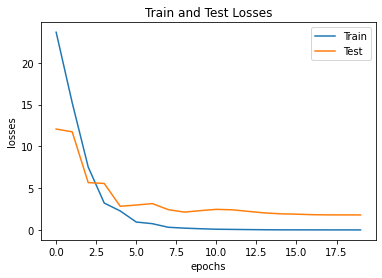

In [59]:
plt.plot(ResNet_results.history['loss'])
plt.plot(ResNet_results.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['Train', 'Test'])
plt.title('Train and Test Losses')
plt.show()

## Plot the accuracy

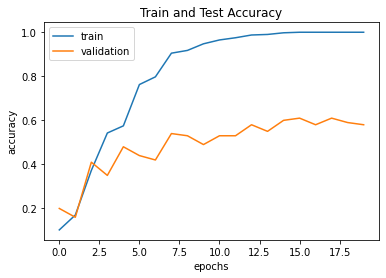

In [60]:
plt.plot(np.array(ResNet_results.history['accuracy']))
plt.plot(np.array(ResNet_results.history['val_accuracy']))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.title('Train and Test Accuracy')
plt.show()

## Confusion Matrix and Accuracy

### Train

In [61]:
Resnet_train_pred = ResNet_baseline.predict(X_train)
Resnet_train_pred_argmax = np.argmax(Resnet_train_pred, axis = 1)

accuracy_score(y_train, Resnet_train_pred_argmax)

13/13 [==============================] - 19s 1s/step


1.0

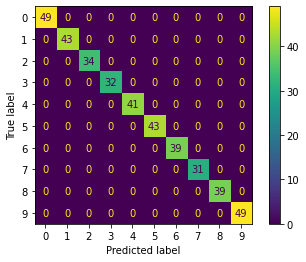

In [62]:
cm = confusion_matrix(y_train, Resnet_train_pred_argmax)
disp = ConfusionMatrixDisplay(cm).plot()
plt.show()

### Test

In [63]:
Resnet_test_pred = ResNet_baseline.predict(X_test)
Resnet_test_pred_argmax = np.argmax(Resnet_test_pred, axis = 1)

accuracy_score(y_test, Resnet_test_pred_argmax)

4/4 [==============================] - 4s 808ms/step


0.58

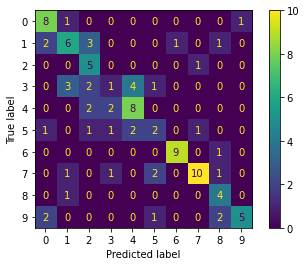

In [64]:
cm = confusion_matrix(y_test, Resnet_test_pred_argmax)
disp = ConfusionMatrixDisplay(cm).plot()
plt.show()

# ResNet Extract Features

In [59]:
ResNet_model.trainable = False

output= ResNet_model.layers[-1].output
output=Conv2D(1024,(1,1), padding = 'same', activation='relu')(output)
output = GlobalAveragePooling2D()(output)
ResNet_model_featuers= Model(inputs=ResNet_model.input, outputs=output)
# ResNet_model_featuers.summary()

In [60]:
X_train_resnet = ResNet_model_featuers(X_train)
X_test_tesnet= ResNet_model_featuers(X_test)
X_train_final = np.concatenate((np.array(X_train_resnet), X_train_z), axis = 1)
X_test_final = np.concatenate((np.array(X_test_tesnet), X_test_z), axis = 1)


In [78]:
%store X_train_final
%store X_test_final

# %store -r X_train_final
# %store -r X_test_final

Stored 'X_train_final' (ndarray)
Stored 'X_test_final' (ndarray)


# Machine Learning Models

In [30]:
def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    return train_score,test_score

# Testing on our feature selection

In [61]:
# y_train_0 = np.array([np.where(uni == i)[0][0] for i in y_train])
# y_test_0 = np.array([np.where(uni == i)[0][0] for i in y_test])
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
X_train_final_scalled = scaller.fit_transform(X_train_final)
X_test_final_scalled = scaller.transform(X_test_final)

In [62]:

evaluation_models = [(LinearSVC(random_state=0), "Linear Support Vector"), 
                     (SVC(random_state=0), "RBF kernel SVM"),
                     (RandomForestClassifier(random_state=0), "Random forest"),
                     (MLPClassifier(random_state=0), "Multi-layer Perceptron"),
                     (KNeighborsClassifier(n_neighbors=6,), "KNN with 10 neighbors"),
                     (GaussianNB(), "Naive Bayes"),
                    #  (CatBoostClassifier(random_state=0,n_estimators=100,verbose=0), "CatBoost Classifier"),
                     (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), "XGBoost")
                     ]
train, test,average = [1],[.58],[.79]

for model in evaluation_models:
    train_score,test_score = model_building(model[0], X_train_final_scalled, X_test_final_scalled, y_train, y_test)
    ave =(train_score+test_score)/2
    train.append(train_score)
    test.append(test_score)
    average.append(ave)
    print(f"{model[1]}                  Train: {train_score}, Test: {test_score}, Average: {ave}")

Linear Support Vector                  Train: 1.0, Test: 0.58, Average: 0.79
RBF kernel SVM                  Train: 0.9575, Test: 0.56, Average: 0.75875
Random forest                  Train: 1.0, Test: 0.5, Average: 0.75
Multi-layer Perceptron                  Train: 1.0, Test: 0.63, Average: 0.815
KNN with 10 neighbors                  Train: 0.66, Test: 0.41, Average: 0.535
Naive Bayes                  Train: 0.8, Test: 0.43, Average: 0.615
XGBoost                  Train: 1.0, Test: 0.49, Average: 0.745


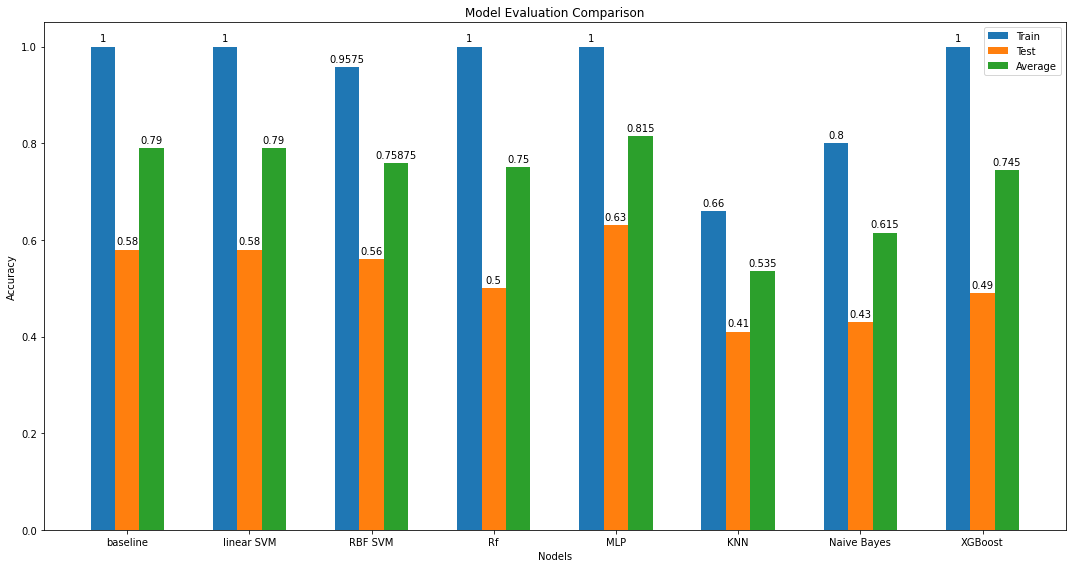

In [63]:
models_names = ["baseline", "linear SVM","RBF SVM","Rf","MLP","KNN","Naive Bayes","XGBoost"]

x = np.arange(len(models_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
  # best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM
rects1 = ax.bar(x - width, train, width, label='Train')
rects2 = ax.bar(x, test, width, label='Test')
rects3 = ax.bar(x + width,average, width, label='Average')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Nodels')
ax.set_title('Model Evaluation Comparison')
ax.set_xticks(x, models_names )
ax.legend()

fig.tight_layout()

plt.show()

# Data Augmentation

5


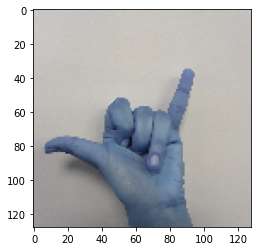

In [35]:
plt.imshow(X_train[0])
print(y_train[0])

In [64]:
# from keras.preprocessing.image import ImageDataGenerator

# data_gen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         # rescale=1./255,
#         shear_range=0.1,
#         zoom_range=0.1,
#         # horizontal_flip=True,
#         fill_mode='nearest')
# data_gen.fit(X_train)
# train_gen = data_gen.flow(X_train, y_train,batch_size=16 ,seed=42,shuffle = True)
# X_new,y_new = [],[]
# num_gen = 500
# for i, x in enumerate(train_gen):
#         X_new.append(x[0][0].astype("uint8"))
#         y_new.append(x[1][0])
#         if i ==num_gen:
#                 break
# X_new,y_new = np.array(X_new), np.array(y_new)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rotation_range=10, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               channel_shift_range=10.,)

generator.fit(X_train)
train_generated = generator.flow(X_train, y_train,batch_size=20,seed=42,shuffle = True)

In [13]:
X_train_gen = []
y_train_gen = []

for i in range(len(train_generated)):
  x_train_20 = train_generated[i][0]
  y_train_20 = train_generated[i][1]

  for i in range(len(x_train_20)):
    X_train_gen.append(x_train_20[i])

  for i in range(len(y_train_20)): 
    y_train_gen.append(y_train_20[i])

In [16]:
X_train_gen.shape

(400, 128, 128, 3)

In [19]:
X_train_gen = np.array(X_train_gen).astype('float32')
y_train_gen = np.array(y_train_gen).astype('uint8')

In [22]:
X_train_gen.min()

0.0

add the generated with the original images (training)

In [40]:
def unison_shuffled_copies(a, b,c):
    assert len(a) == len(b)
    assert len(b) == len(c)

    p = np.random.permutation(len(a))
    return a[p], b[p],c[p]


In [41]:
# X_train_gen,y_train_gen = np.concatenate((X_train,X_new),axis= 0), np.concatenate((y_train,y_new),axis= 0)

In [79]:
X_train_gen_int = X_train_gen.astype("uint8")

In [80]:
X_new_free = []
for image in X_train_gen_int:
    X_new_free.append(remove(image))
X_new_free = np.array(X_new_free)

In [66]:
# # %store X_new_free
# # %store X_train_gen

# %store -r X_new_free
%store -r X_train_gen

# # %store X_new
# # %store y_new

# # %store -r X_new_free
# # %store -r X_new
# # %store -r y_new

In [82]:
X_train_z_g = []
radius = input_shape//2
for img in X_new_free[:,:,:,0]:
    X_train_z_g.append(getZernike(img,radius = radius))

X_train_z_g = np.array(X_train_z_g)


In [64]:
# %store X_train_z_g
%store -r X_train_z_g

In [61]:

# X_train_z_g_all = np.concatenate((X_train_z,X_train_z_g),axis= 0)

# X_train_gen,y_train_gen,X_train_z_gen = unison_shuffled_copies(X_train_gen,y_train_gen, X_train_z_g_all)

In [67]:
X_train_resnet_gen = ResNet_model_featuers(X_train_gen)
X_test_tesnet= ResNet_model_featuers(X_test)
X_train_final_gen = np.concatenate((np.array(X_train_resnet_gen), X_train_z_g), axis = 1)
X_test_final = np.concatenate((np.array(X_test_tesnet), X_test_z), axis = 1)

In [39]:
# %store X_train_final_gen
# %store y_train_gen
# %store X_test_final
%store -r X_train_final_gen
%store -r y_train_gen
%store -r X_test_final

# %store -r X_train_final_gen
# %store -r y_train_gen

In [68]:
print(y_test.min())
print(y_train_gen.max())

0
9


### Visualize five samples of each class by plotting a grid using the matplotlib library

In [28]:
num_labels = len(np.unique(y_train_gen))

In [29]:
import random 


random.seed(100) # set a seed in case you want your experiments to be consistent

visualize_samples = []
sampleIndexes =[]
for i in np.unique(y_train_gen):
    images = X_train_gen[np.array(y_train_gen==i).reshape(-1)]
    allIndexes = list(range(0,len(images)))
    sampleIndexes = random.sample(allIndexes,5)
    visualize_samples.append(images[sampleIndexes])

In [37]:
visualize_samples = np.array(visualize_samples).astype("uint8")

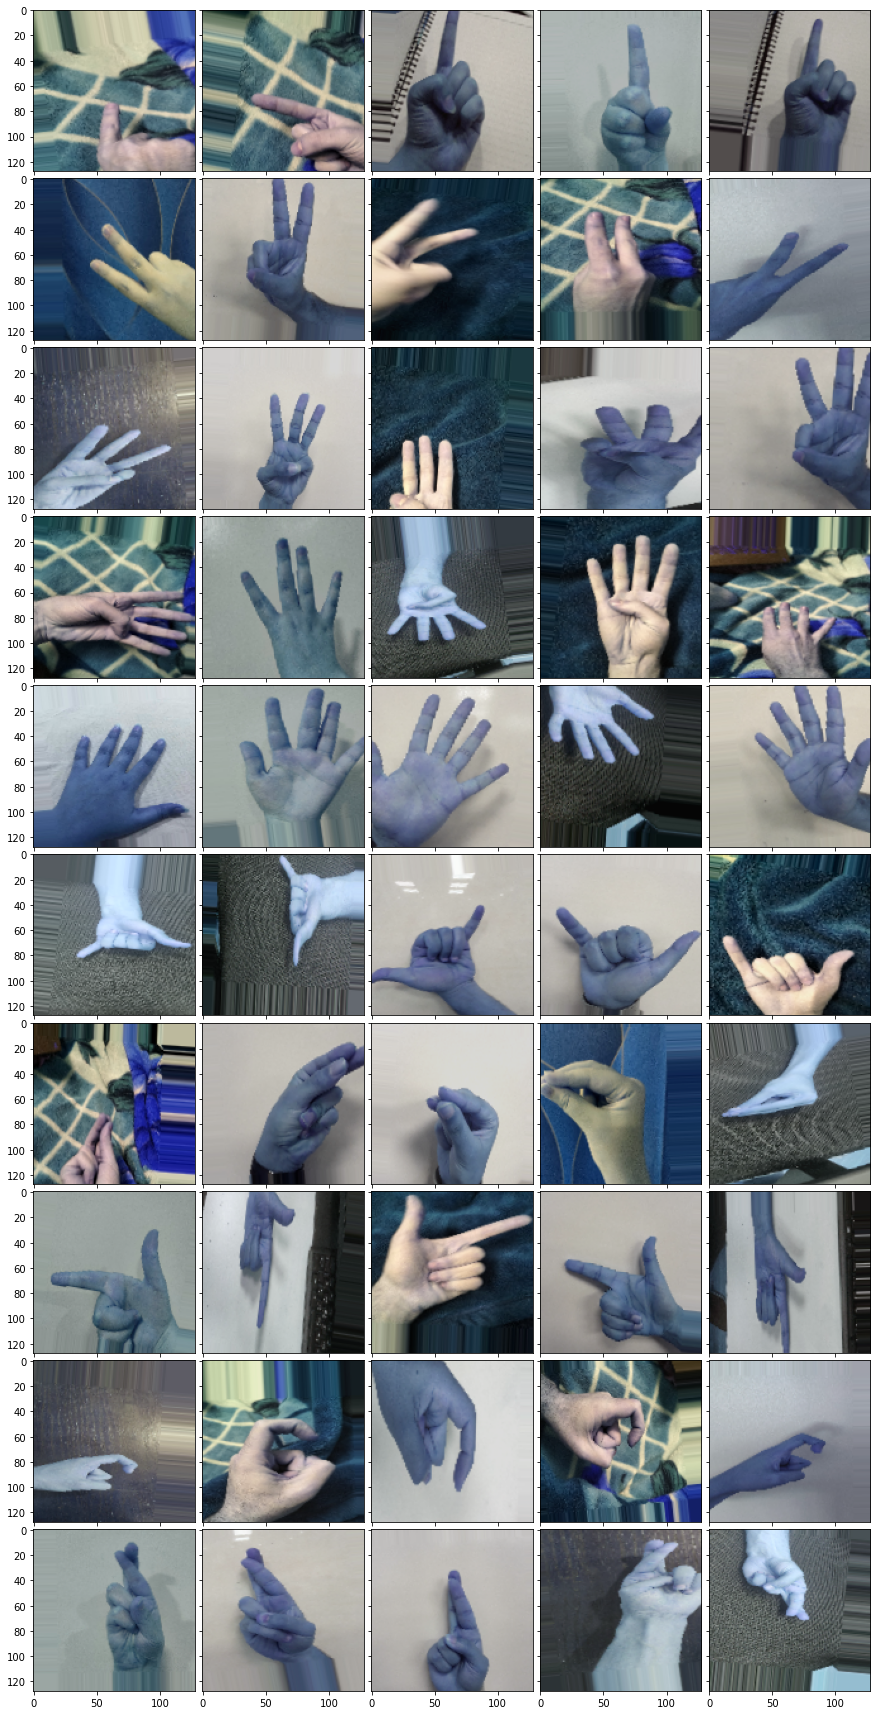

In [38]:

fig = plt.figure(figsize=(15., 200.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(num_labels, 5),  
                    axes_pad=0.1,  # pad between axes in inch.
                    )
g = 0
for r in range(num_labels):
    for c in range(5):
        grid[g].imshow(visualize_samples[r][c])
        g+=1
plt.show()

# Baseline with data Augmentation

In [45]:
# scaller = StandardScaler()
# X_train_gen_scalled = X_train_gen/255
X_test_scalled = X_test/255

X_test_scalled.max()

1.0

In [52]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16869696394630867295
xla_global_id: -1
]


In [57]:
# X_new_scalled = X_train_gen/255
ResNet_baseline.compile(optimizer=Adam(),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

ResNet_results2  =ResNet_baseline.fit(X_train_gen,y_train_gen,
                                 steps_per_epoch = 20,
                                 epochs=20,
                                 verbose=1,
                                 batch_size=64,
                                 callbacks=[callback], 
                                 validation_data=(X_test, y_test))

Epoch 1/20
20/20 [==============================] - 99s 3s/step - loss: 0.4178 - accuracy: 0.9240 - val_loss: 2.3249 - val_accuracy: 0.1000
Epoch 2/20
20/20 [==============================] - 58s 3s/step - loss: 0.0888 - accuracy: 0.9762 - val_loss: 2.3194 - val_accuracy: 0.0900
Epoch 3/20
20/20 [==============================] - 64s 3s/step - loss: 0.0417 - accuracy: 0.9886 - val_loss: 2.3142 - val_accuracy: 0.0900
Epoch 4/20
20/20 [==============================] - 59s 3s/step - loss: 0.0646 - accuracy: 0.9868 - val_loss: 2.2939 - val_accuracy: 0.1500
Epoch 5/20
20/20 [==============================] - 58s 3s/step - loss: 0.0693 - accuracy: 0.9894 - val_loss: 2.2913 - val_accuracy: 0.1300
Epoch 6/20
20/20 [==============================] - 58s 3s/step - loss: 0.1043 - accuracy: 0.9754 - val_loss: 2.3058 - val_accuracy: 0.1200
Epoch 7/20
20/20 [==============================] - 58s 3s/step - loss: 0.1806 - accuracy: 0.9639 - val_loss: 2.3193 - val_accuracy: 0.1300
Epoch 8/20
20/20 [==

## Plot the loss

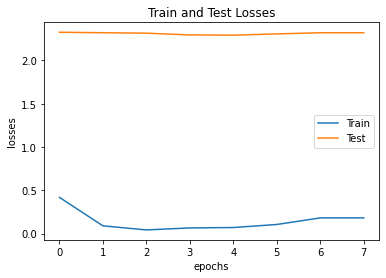

In [58]:
plt.plot(ResNet_results2.history['loss'])
plt.plot(ResNet_results2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['Train', 'Test'])
plt.title('Train and Test Losses')
plt.show()

## Plot the accuracy

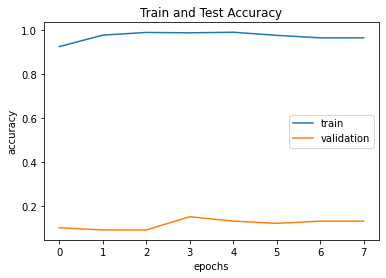

In [59]:
plt.plot(np.array(ResNet_results2.history['accuracy']))
plt.plot(np.array(ResNet_results2.history['val_accuracy']))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.title('Train and Test Accuracy')
plt.show()

## Confusion Matrix and Accuracy

### Train

In [62]:
Resnet_train_pred = ResNet_baseline.predict(X_train_gen)
Resnet_train_pred_argmax = np.argmax(Resnet_train_pred, axis = 1)


13/13 [==============================] - 28s 2s/step


0.985


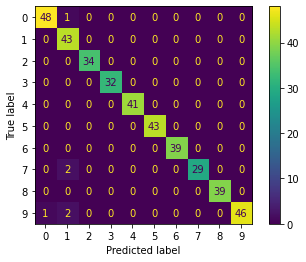

In [63]:
print(accuracy_score(y_train_gen, Resnet_train_pred_argmax))
cm = confusion_matrix(y_train_gen, Resnet_train_pred_argmax)
disp = ConfusionMatrixDisplay(cm).plot()
plt.show()

### Test

In [64]:
Resnet_test_pred = ResNet_baseline.predict(X_test)
Resnet_test_pred_argmax = np.argmax(Resnet_test_pred, axis = 1)

accuracy_score(y_test, Resnet_test_pred_argmax)

4/4 [==============================] - 8s 1s/step


0.46

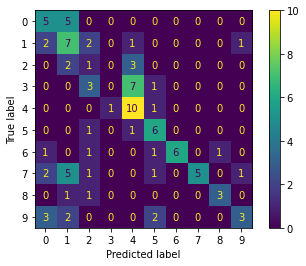

In [65]:
cm = confusion_matrix(y_test, Resnet_test_pred_argmax)
disp = ConfusionMatrixDisplay(cm).plot()
plt.show()

# Testing on our feature selection with Data Augmentation

In [69]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp


scaller = StandardScaler()
X_train_final_gen_scalled = scaller.fit_transform(X_train_final_gen)
X_test_final_scalled = scaller.transform(X_test_final)

In [70]:

evaluation_models = [(LinearSVC(random_state=0), "Linear Support Vector"), 
                     (SVC(random_state=0), "RBF kernel SVM"),
                     (RandomForestClassifier(random_state=0), "Random forest"),
                     (MLPClassifier(random_state=0), "Multi-layer Perceptron"),
                     (KNeighborsClassifier(n_neighbors=6,), "KNN with 6 neighbors"),
                     (GaussianNB(), "Naive Bayes"),
                    #  (CatBoostClassifier(random_state=0,n_estimators=100,verbose=0), "CatBoost Classifier"),
                     (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), "XGBoost")
                     ]
train, test,average = [],[],[]
total_error, bias, variance = [],[],[]
for model in evaluation_models:
    train_score,test_score = model_building(model[0], X_train_final_gen_scalled, X_test_final_scalled, y_train_gen, y_test)
    ave =(train_score+test_score)/2
    train.append(train_score)
    test.append(test_score)
    average.append(ave)


    # avg_expected_loss, avg_bias, avg_var = bias_variance_decomp( model[0], X_train_final_gen_scalled, X_test_final_scalled, y_train_gen, y_test,
    #     loss='0-1_loss',
    #     random_seed=0)
    # total_error.append(avg_expected_loss)
    # bias.append(avg_bias)
    # variance.append(avg_var)
    
    print(f"{model[1]}      Train: {train_score}, Test: {test_score}, Average: {ave},")#" avg_expected_loss {avg_expected_loss}, avg_bias {avg_bias}, avg_var {avg_var}")

Linear Support Vector      Train: 1.0, Test: 0.49, Average: 0.745,
RBF kernel SVM      Train: 0.945, Test: 0.45, Average: 0.6975,
Random forest      Train: 1.0, Test: 0.46, Average: 0.73,
Multi-layer Perceptron      Train: 1.0, Test: 0.49, Average: 0.745,
KNN with 6 neighbors      Train: 0.565, Test: 0.36, Average: 0.46249999999999997,
Naive Bayes      Train: 0.7425, Test: 0.4, Average: 0.57125,
XGBoost      Train: 1.0, Test: 0.39, Average: 0.6950000000000001,


In [71]:
# train_score= [1.0, 1.0, 0.84, 1.0, 1,0.6325,0.7475,1 ]
# test_score= [0.58, 0.12, 0.1, 0.48, 0.63, 0.45, 0.4, 0.58]
# average_score= [0.79, 0.56, 0.47, 0.74, 0.815, 0.54125, 0.57375, 0.79]

train.insert(0,0.985)
test.insert(0, .46)
average.insert(0,0.7225 )

train.insert(0,1)
test.insert(0, .58)
average.insert(0,.79 )



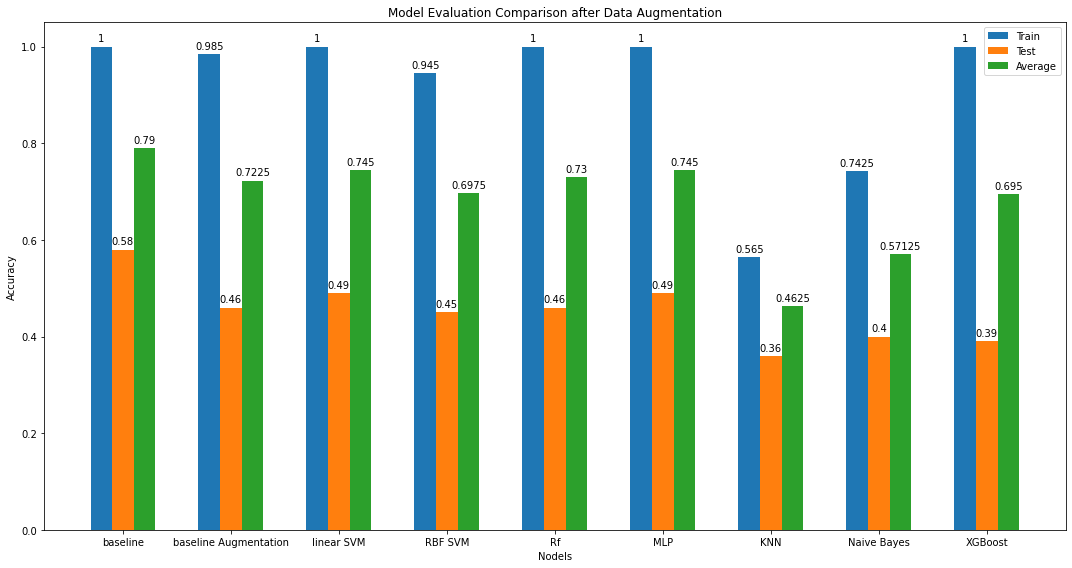

In [72]:
models_names = ["baseline","baseline Augmentation", "linear SVM","RBF SVM","Rf","MLP","KNN","Naive Bayes","XGBoost"]

x = np.arange(len(models_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
  # best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM
rects1 = ax.bar(x - width, train, width, label='Train')
rects2 = ax.bar(x, test, width, label='Test')
rects3 = ax.bar(x + width,average, width, label='Average')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Nodels')
ax.set_title('Model Evaluation Comparison after Data Augmentation')
ax.set_xticks(x, models_names )
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Hyper parameter tuning for MLP
BayesSearchCV is an informed search algorithm that learns from the previous iterations and makes use of it. It's much more efficient than the grid search as it doesn't try all the possibilities.<br>
Fore more information: https://towardsdatascience.com/grid-search-vs-random-search-vs-bayesian-optimization-2e68f57c3c46 

In [79]:
from sklearn.model_selection import PredefinedSplit
from matplotlib import rcParams
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
X_train_final_scalled = scaller.fit_transform(X_train_final)
X_test_final_scalled = scaller.transform(X_test_final)

In [84]:
hyperparameters = {
    # "hidden_layer_sizes": [(50,),(100,),(150,)],
    "activation":["identity", "logistic", "tanh", "relu"],
          'alpha':(0.0001,0.001,0.003,0.006),# Strength of the L2 regularization term
          'max_iter':(100,200,500), 
          'learning_rate':("constant","invscaling","adaptive"),
          "learning_rate_init":(0.0001,0.001,0.005,0.01)
          }

# this step is important for the tuning evaluation to be based on the pre-defined validation list
# -1 for training and 0 for validation indexes
# split_index = [-1 if x in X_train.index else 0 for x in X_train_val.index]
# ps = PredefinedSplit(test_fold=split_index)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 0)
mlp_optizer = BayesSearchCV(mlp,
                    hyperparameters,
                    scoring="accuracy",
                    # cv=ps,
                    n_iter=100,
                    # optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

In [85]:
# X_train_final, X_test_final, y_train, y_test
mlp_optizer.fit(X_train_final_scalled ,y_train)

BayesSearchCV(estimator=MLPClassifier(random_state=0), n_iter=100,
              random_state=42, scoring='accuracy',
              search_spaces={'activation': ['identity', 'logistic', 'tanh',
                                            'relu'],
                             'alpha': (0.0001, 0.001, 0.003, 0.006),
                             'learning_rate': ('constant', 'invscaling',
                                               'adaptive'),
                             'learning_rate_init': (0.0001, 0.001, 0.005, 0.01),
                             'max_iter': (100, 200, 500)})

In [86]:
print("mlp_optizer.best_score_ :",mlp_optizer.best_score_)
print("mlp_optizer.best_params_ :",mlp_optizer.best_params_)

mlp_optizer.best_score_ : 0.635
mlp_optizer.best_params_ : OrderedDict([('activation', 'logistic'), ('alpha', 0.003), ('learning_rate', 'constant'), ('learning_rate_init', 0.0001), ('max_iter', 500)])


In [87]:
from sklearn.neural_network import MLPClassifier

mlp_tuned = MLPClassifier(activation = 'logistic',alpha =0.003, learning_rate = 'constant',learning_rate_init = 0.0001, max_iter = 500,random_state = 0 )
mlp_tuned.fit(X_train_final_scalled ,y_train)

MLPClassifier(activation='logistic', alpha=0.003, learning_rate_init=0.0001,
              max_iter=500, random_state=0)

In [88]:
pred = mlp_tuned.predict(X_train_final_scalled)
print("train score = ", accuracy_score(y_train,pred))
pred2 = mlp_tuned.predict(X_test_final_scalled)
print("test score = ", accuracy_score(y_test,pred2))

train score =  0.995
test score =  0.64
